In [2]:
import cv2
import matplotlib.pyplot as plt

fon1 = cv2.imread('materialy_feature_points/fontanna1.jpg')
fon1 = cv2.cvtColor(fon1, cv2.COLOR_BGR2GRAY)

fon2 = cv2.imread('materialy_feature_points/fontanna2.jpg')
fon2 = cv2.cvtColor(fon2, cv2.COLOR_BGR2GRAY)

In [5]:
import numpy as np
import scipy.ndimage.filters as filters

def harris(img, size=7, K=0.05):

    Ix = cv2.Sobel(img, cv2.CV_32F, 1, 0, size)
    Iy = cv2.Sobel(img, cv2.CV_32F, 0, 1, size)

    I2x = cv2.Sobel(Ix, cv2.CV_32F, 1, 0, size)
    I2y = cv2.Sobel(Iy, cv2.CV_32F, 0, 1, size)
    Ixy = cv2.Sobel(Ix, cv2.CV_32F, 0, 1, size)

    I2xGaus = cv2.GaussianBlur(I2x, (size, size), 0)
    I2yGaus = cv2.GaussianBlur(I2y, (size, size), 0)
    IxyGaus = cv2.GaussianBlur(Ixy, (size, size), 0)

    H = np.zeros(img.shape).astype('float32')
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            det = I2xGaus[y, x] * I2yGaus[y, x] - IxyGaus[y, x] * IxyGaus[y, x]
            trace = I2xGaus[y, x] + I2yGaus[y, x]
            val = det - K * trace**2
            H[y, x] = val

    H = (H-np.min(H))/(np.max(H)-np.min(H))
    return H


def find_max(image, size, threshold): #size - maximum filter mask size
    data_max = filters.maximum_filter(image, size)
    maxima = (image == data_max)
    diff = image > threshold
    maxima [diff == 0] = 0
    return np.nonzero(maxima)

In [ ]:
size = 7
H_out = harris(fon1, size)
maxes = find_max(H_out, size, 0.45)

In [ ]:
def draw_stars(img, pts):
    plt.figure()
    plt.imshow(img, 'gray')
    plt.plot(pts[1], pts[0], '*', color='r')
    plt.show()

bud1 = cv2.imread('materialy_feature_points/budynek1.jpg')
bud1 = cv2.cvtColor(bud1, cv2.COLOR_BGR2GRAY)
bud2 = cv2.imread('materialy_feature_points/budynek2.jpg')
bud2 = cv2.cvtColor(bud2, cv2.COLOR_BGR2GRAY)

size = 7

for img in [fon1, fon2, bud1, bud2]:
    H = harris(img, size)
    maxes = find_max(H, size, 0.5)
    draw_stars(img, maxes)

In [23]:
def descriptions(img, pts, size):
    Y, X = img.shape

    pts = list(filter(lambda pt: pt[0] >= size and pt[0] < Y - size 
                      and pt[1]>= size and pt[1] < X - size, zip(pts[0], pts[1])))
    
    descs = []
    for p in pts:
        desc = img[p[0]-size:p[0]+size+1, p[1]-size:p[1]+size+1]
        desc = desc.flatten()
        descs.append(desc)

    output = list(zip(pts, descs))
    return output

(160, 398)


C:\Users\krzys\AppData\Local\Temp\ipykernel_13700\2281845047.py:30: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


In [55]:
fon1 = cv2.imread('materialy_feature_points/fontanna1.jpg')
fon1 = cv2.cvtColor(fon1, cv2.COLOR_BGR2GRAY)
fon2 = cv2.imread('materialy_feature_points/fontanna2.jpg')
fon2 = cv2.cvtColor(fon2, cv2.COLOR_BGR2GRAY)

size = 15

H1 = harris(fon1, size)
maxes1 = find_max(H1, size, 0.5)
pts_descs1 = descriptions(fon1, maxes1, size)

H2 = harris(fon2, size)
maxes2 = find_max(H2, size, 0.5)
pts_descs2 = descriptions(fon2, maxes2, size)

C:\Users\krzys\AppData\Local\Temp\ipykernel_13700\2281845047.py:30: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


In [56]:
def vector_diff(v1, v2):
    return sum(abs(v1 - v2))

def compare_descs(pts_descs1, pts_descs2, n):

    comparison = []

    for pts1, v1 in pts_descs1:
        for pts2, v2 in pts_descs2:
            diff = vector_diff(v1, v2)
            value = [pts1, pts2, diff]
            comparison.append(value)
    
    comparison.sort(key=lambda x: x[2], reverse=True)
    comparison = comparison[:n]

    return comparison

c = compare_descs(pts_descs1, pts_descs2, 20)

C:\Users\krzys\AppData\Local\Temp\ipykernel_13700\2281845047.py:30: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


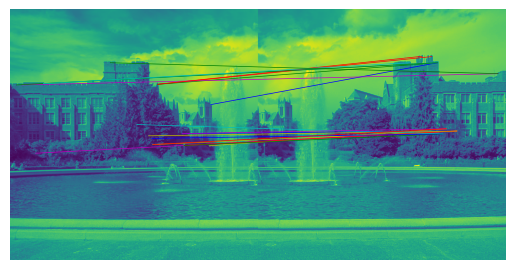

In [61]:
from materialy_feature_points import pm

def matches_flow(path1, path2, size=15, n=20):
    path1 = 'materialy_feature_points/' + path1
    path2 = 'materialy_feature_points/' + path2

    img1 = cv2.imread(path1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.imread(path2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    H1 = harris(img1, size)
    maxes1 = find_max(H1, size, 0.5)
    pts_descs1 = descriptions(img1, maxes1, size)

    H2 = harris(img2, size)
    maxes2 = find_max(H2, size, 0.5)
    pts_descs2 = descriptions(img2, maxes2, size)

    c = compare_descs(pts_descs1, pts_descs2, n)

    pm.plot_matches(img1, img2, c)

matches_flow('fontanna1.jpg', 'fontanna2.jpg', 15)

C:\Users\krzys\AppData\Local\Temp\ipykernel_13700\2281845047.py:30: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


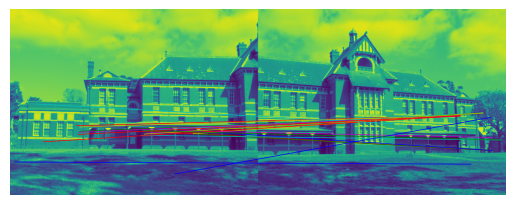

In [62]:
matches_flow('budynek1.jpg', 'budynek2.jpg')

C:\Users\krzys\AppData\Local\Temp\ipykernel_13700\2281845047.py:30: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


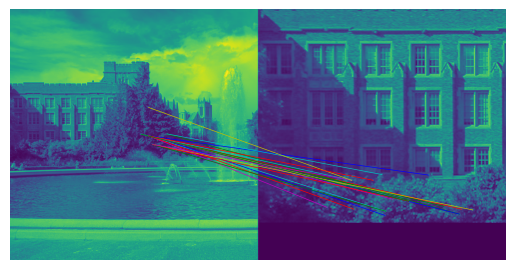

In [63]:
matches_flow('fontanna1.jpg', 'fontanna_pow.jpg')

C:\Users\krzys\AppData\Local\Temp\ipykernel_13700\2281845047.py:30: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


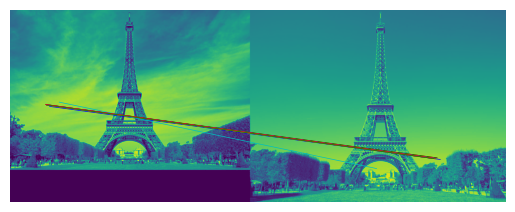

In [64]:
matches_flow('eiffel1.jpg', 'eiffel2.jpg')

In [65]:
def descriptions_modified(img, pts, size):
    Y, X = img.shape

    pts = list(filter(lambda pt: pt[0] >= size and pt[0] < Y - size 
                      and pt[1]>= size and pt[1] < X - size, zip(pts[0], pts[1])))
    
    descs = []
    for p in pts:
        desc = img[p[0]-size:p[0]+size+1, p[1]-size:p[1]+size+1]
        desc = desc.flatten()
        
        mean = np.mean(desc)
        std = np.std(desc)
        desc = (desc - mean) / std

        descs.append(desc)

    output = list(zip(pts, descs))
    return output

def matches_flow_modified(path1, path2, size=15, n=20):
    path1 = 'materialy_feature_points/' + path1
    path2 = 'materialy_feature_points/' + path2

    img1 = cv2.imread(path1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.imread(path2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    H1 = harris(img1, size)
    maxes1 = find_max(H1, size, 0.5)
    pts_descs1 = descriptions(img1, maxes1, size)

    H2 = harris(img2, size)
    maxes2 = find_max(H2, size, 0.5)
    pts_descs2 = descriptions_modified(img2, maxes2, size)

    c = compare_descs(pts_descs1, pts_descs2, n)

    pm.plot_matches(img1, img2, c)

C:\Users\krzys\AppData\Local\Temp\ipykernel_13700\2281845047.py:30: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


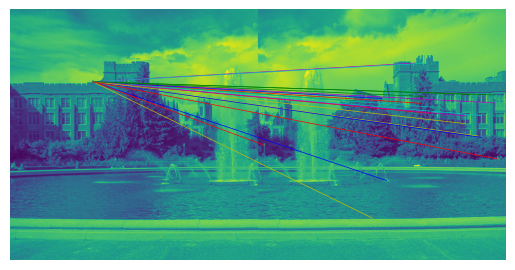

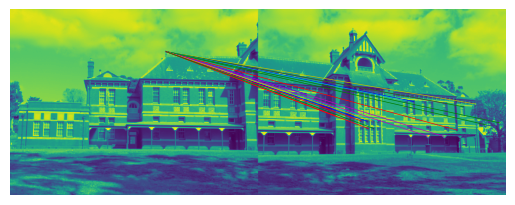

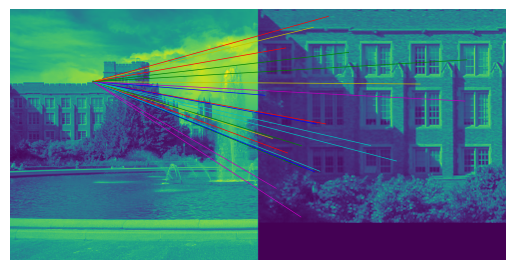

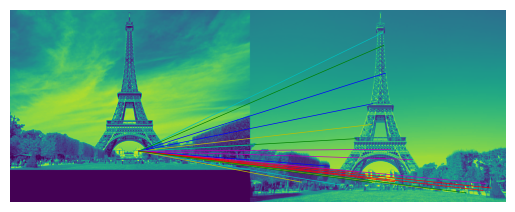

In [66]:
matches_flow_modified('fontanna1.jpg', 'fontanna2.jpg')
matches_flow_modified('budynek1.jpg', 'budynek2.jpg')
matches_flow_modified('fontanna1.jpg', 'fontanna_pow.jpg')
matches_flow_modified('eiffel1.jpg', 'eiffel2.jpg')

In [ ]:
fon1 = cv2.imread('materialy_feature_points/fontanna1.jpg')
fon1 = cv2.cvtColor(fon1, cv2.COLOR_BGR2GRAY)
fon2 = cv2.imread('materialy_feature_points/fontanna2.jpg')
fon2 = cv2.cvtColor(fon2, cv2.COLOR_BGR2GRAY)

def manhatan_dist(y, x, m):
    return abs(y-m) + abs(x-m)

def fast(seg, n=9, t=10):
    m = seg.shape[0] // 2
    central = seg[m, m]

    fitting = 0
    for y in range(seg.shape[0]):
        for x in range(seg.shape[1]):
            if y == m and x == m:
                continue
                
            desired_dist = None
            if y == m or x == m:
                desired_dist = m
            else:
                desired_dist = m + 1
            
            if desired_dist != manhatan_dist(y, x, m):
                continue
            
            if seg[y, x] < central - t or seg[y, x] > central + t:
                fitting += 1
    return fitting >= n
  
def obs(img):

    points = []
    harr = harris(img)
    size = 7
    r = size // 2

    harr_values=[]

    for y in range(r, img.shape[0] - r - 1):
        for x in range(r, img.shape[1] - r - 1):
            seg = img[y-r:y+r+1, x-r:x+r+1]

            if fast(seg):
                points.append((y, x))
                harr_values.append(harr[y, x])
                print((y, x))

    output = dict(zip(points, harr_values))
    return output


o = obs(fon1)

In [38]:
for point, harr_value in o:
    print(point, harr_value)
    break
print(type(o))

15 453
<class 'dict'>


In [49]:
def non_max(img, points: dict):

    # pts, harr_values = points
    values_to_remove = []
    for p, h in points.items():
        y, x = p
        values = []
        for i in range(y-1, y+2):
            for j in range(x-1, x+2):
                if i<0 or j<0 or i>img.shape[0]-1 or j>img.shape[1]-1:
                    continue
                if (i, j) in points:
                    values.append(((i, j), points[(i, j)]))

        if len(values) > 1:
            values.sort(key=lambda x: x[1])
            # print(len(values))
            values_to_remove.append(values[:-1],)
            # print(len(values_to_remove))
            
    print(len(values_to_remove))

non_max(fon1, o)
        


    # for y in range(1, img.shape[0]-1, 3):
    #     for x in range(1, img.shape[1]-1, 3):

    #         points_in_seg = []
    #         seg = img[y-1:y+2, x-1:x+2]
    #         for i in range(3):
    #             for j in range(3):
    #                 if 


            


279063


In [ ]:
def non_max_suppression(points, threshold=0.5):
    """
    Perform non-maximum suppression on a list of points.

    :param points: List of tuples representing points (x, y)
    :param threshold: Minimum distance threshold between points
    :return: List of points after non-maximum suppression
    """
    suppressed_points = []

    for point, harr_value in points:
        x, y = point
        keep_point = True

        # Check the surrounding 3x3 neighborhood
        for i in range(x - 1, x + 2):
            for j in range(y - 1, y + 2):
                # Skip the central point
                if i == x and j == y:
                    continue

                # Check if there's another point in the neighborhood
                for other_point in points:
                    if (i, j) != other_point:
                        distX = abs(i - other_point[0])
                        distY = abs(j - other_point[1])
                        if distX < 3 or distY < 3:
                            keep_point = False
                            break

                if not keep_point:
                    break

            if not keep_point:
                break

        if keep_point:
            suppressed_points.append((point, harr_value))

    return suppressed_points

filtered_points = non_max_suppression(o)

        